# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

# 1. Topic: NYC Weather
# 2. Question: How have temperature and precipitation changed over time?
# 3. link to datasets 
    ftp://ftp.ncdc.noaa.gov/pub/data/ushcn/v2.5 - precipitation data from ushcn.v2.5.5.20171111
    Menne, M.J., C.N. Williams, and R.S. Vose, 2009:  The United States Historical 
        Climatology Network monthly temperature data?Version 2.  Bulletin of the American 
        Meteorological Society, 90, 993-1007.
    
	ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/v3/csv/ - temperature data from ghcnm.tavg.v3.3.0.20170710.qcu.dat.csv
    J. H. Lawrimore, M. J. Menne, B. E. Gleason, C. N. Williams, 
            D. B. Wuertz, R. S. Vose, and J. Rennie (2011), An overview of the
            Global Historical Climatology Network monthly mean temperature data
            set, version 3, J. Geophys. Res., 116, D19121, 
            doi:10.1029/2011JD016187. 

    Note data station IDs: Ann Arbor, MI = 42500200230, Central Park = 42500305801

In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import calendar
import re
import matplotlib.pyplot as plt

In [2]:
def get_temp(ID, country='425'): 
    #takes an 11 digit station id code (from ushcn-v2.5-stations.txt), and country code defaulted to US
    cols = [0,1] + [i for i in range(1, 51) if i%4==3 ] #columns are Station ID, Year, Element, Value1, 3 columns of flags...
    df = pd.read_csv('ghcnm.tavg.v3.3.0.20170710.qcu.dat.csv', header=None, na_values=-9999, usecols=cols, names=['ID', 'Year'] + calendar.month_abbr[1:])
    df = df[df['ID']==int(country+ID[3:])]
    del df['ID'] #now that all same, don't need
    df.set_index('Year', inplace=True)
    df /= 100/1.8 #convert from hundreths of degrees 
    df += 32      #Celsius to degrees Fahrenheit
    #returns a dataframe with index years, columns by month, and temperature averages in degrees Fahrenheit for ID location
    return df

In [3]:
def get_precip(ID):
    #takes 11 digit station id beginning with USH (from ushcn-v2.5-stations.txt)
    df = pd.read_fwf('ushcn.v2.5.5.20171111/'+ ID + '.raw.prcp', header=None, na_values=[-9999,9999], index_col = 'Year', usecols=[1] + [i for i in range(1,26) if i%2==0], names=['Year']+calendar.month_abbr[1:])
    df.replace('[a-zA-Z]*', '', regex=True, inplace=True)#removes any extra flags
    df = df.astype(float)
    df /= 254 #convert tenths of milimeters to inches
    #returns a dataframe with index years, columns by month, and total precipitation amounts in inches as values
    return df

In [4]:
def clean_graph(ax, left='off', bot='on'):
    #takes axes, defaults to remove left but bottom not labels, removes ticks and spines
    ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft=left, labelbottom=bot)
    for spine in ax.spines.values(): #removes the frame
        spine.set_visible(False)
    return

In [5]:
#Tried plotting simultaneously - confusing looking and gives no new information
''''plt.plot(nypr_recent_total.loc[2000:], label = 'Precipitation', alpha=.5)
    plt.xticks(nypr_recent_total.index[::5])
    plt.ylabel='Inches'
    plt.legend(loc='lower right')
    plt.twinx()
    plt.plot(nyctemps_yearavg.loc[2000:2016], label = 'Temperature', color='red', alpha=.5)
    plt.ylabel='Degrees Fahrenheit'
    plt.title('NYC Annual Temperature and Precipitation Information 2000-2016')
    plt.legend(loc='best')
    ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
''';

In [13]:
#GET DATA 
NYC = 'USH00305801' #data ID for Central Park observations from ushcn
nyctemps = get_temp(NYC)
nycprecip = get_precip(NYC)
nycprecip_total = nycprecip.apply(func = np.sum, axis=1)
nycprecip_avg = nycprecip.apply(axis=0, func=np.mean)
nypr_recent_total = nycprecip_total.loc[1986:2016] #last 30 years, not including the unfinished 2017
nyctemps_yearavg = nyctemps[:-1].apply(func=np.mean, axis=1) #Data spans range 1869 - 6/2017
nyctemps_monavg = nyctemps[:-1].apply(func=np.mean, axis=0)  #leave out the incomplete 2017
nyctemps_recent = nyctemps.loc[1986:2016].apply(func=np.mean, axis=0) 
nyctemps_hist = nyctemps.loc[1955:1985].apply(func=np.mean, axis=0) 


<IPython.core.display.Javascript object>


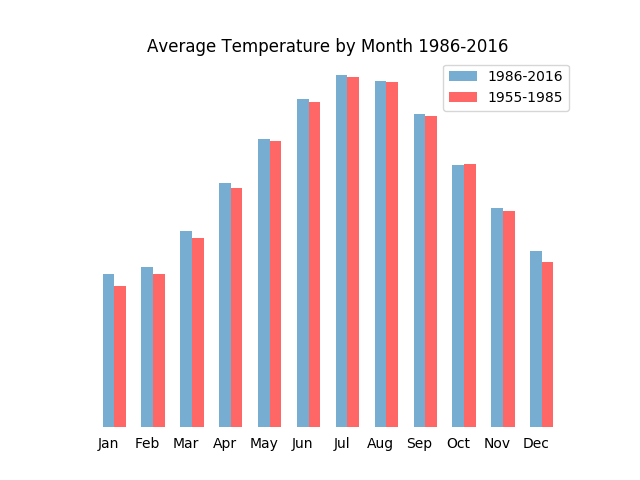

<IPython.core.display.Javascript object>


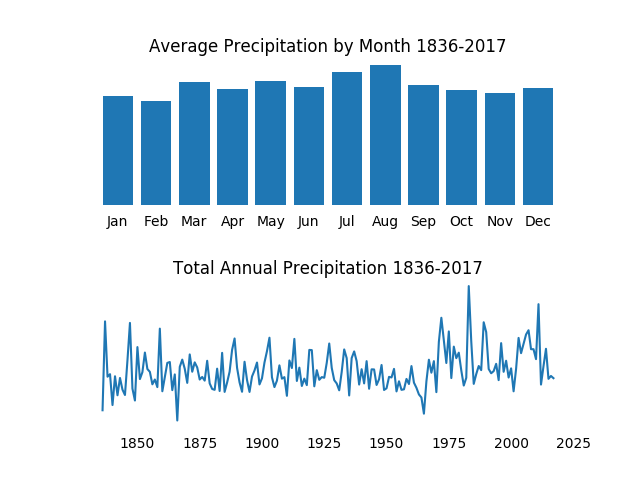

<IPython.core.display.Javascript object>


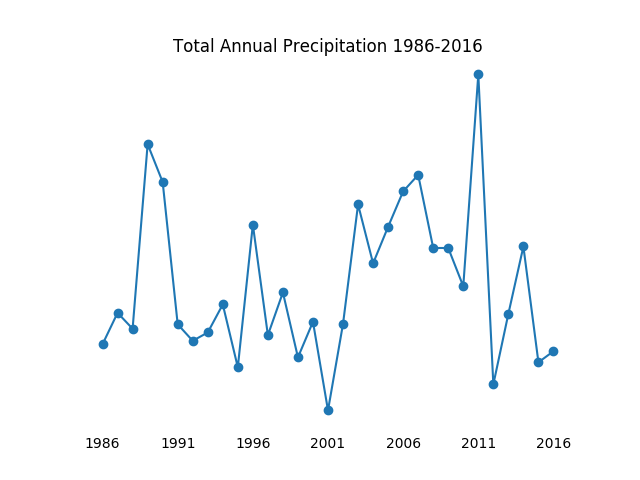

In [7]:
#CELL FOR PRECIPITATION PLOTS

#FIRST FIGURE
f, (ax1, ax2) = plt.subplots(2,1)
plt.subplots_adjust(hspace=0.5)
ax1.bar(range(12),nycprecip_avg)
ax1.set_title('Average Precipitation by Month 1836-2017')
ax1.set_xticks(np.arange(12))
ax1.set_xticklabels(calendar.month_abbr[1:])
clean_graph(ax1)
ax2.plot(nycprecip_total)
ax2.set_title('Total Annual Precipitation 1836-2017')
clean_graph(ax2)
#f.savefig('clean overview of nyc precip.png', facecolor='white')

#SECOND FIGURE
ax = plt.figure().gca()
ax.plot(nypr_recent_total, '-o')
ax.set_title('Total Annual Precipitation 1986-2016')
ax.set_xticks(nypr_recent_total.index[::5])
clean_graph(ax)
#plt.savefig('recent annual precip.png', facecolor='white')

<IPython.core.display.Javascript object>


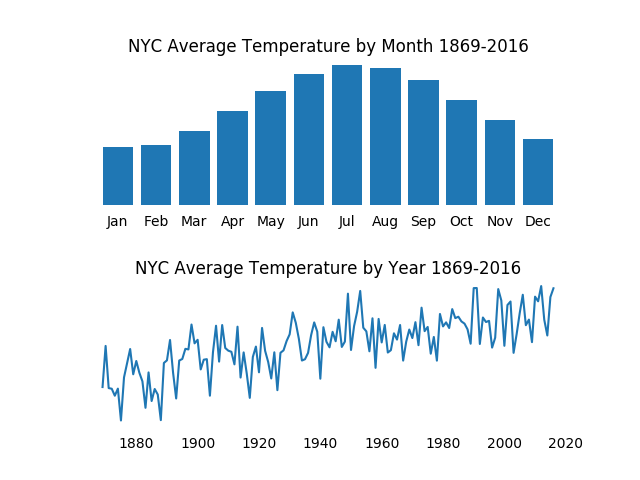

<IPython.core.display.Javascript object>


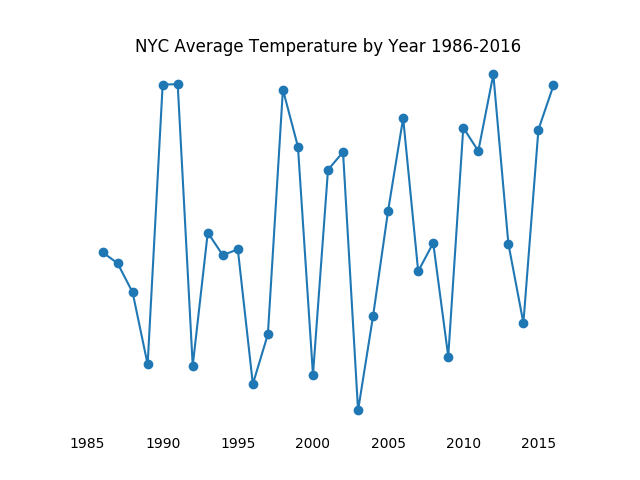

<IPython.core.display.Javascript object>


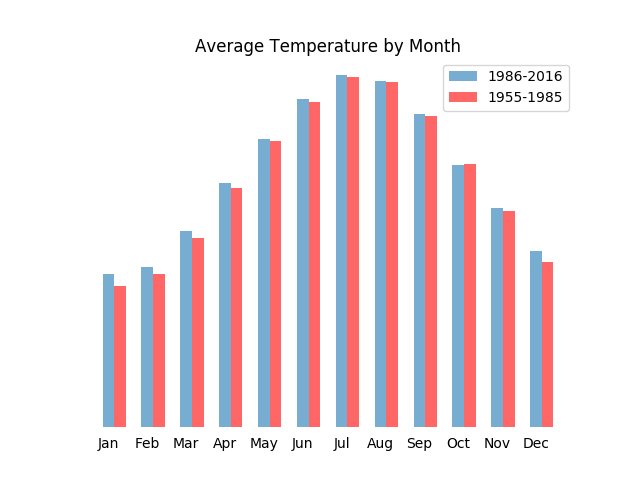

In [39]:
#CELL FOR TEMPERATURE PLOTS


f, (ax1, ax2) = plt.subplots(2,1)
plt.subplots_adjust(hspace=0.5)
ax1.bar(range(12), nyctemps_monavg)
ax1.set_title('NYC Average Temperature by Month 1869-2016')
ax1.set_xticks(np.arange(12))
ax1.set_xticklabels(calendar.month_abbr[1:])
clean_graph(ax1)
ax2.plot(nyctemps_yearavg)
ax2.set_title('NYC Average Temperature by Year 1869-2016')
clean_graph(ax2)
#f.savefig('nyc temps overview.png', facecolor='white')

ax = plt.figure().gca()
ax.plot(nyctemps_yearavg.loc[1986:2016], '-o')
ax.set_title('NYC Average Temperature by Year 1986-2016')
clean_graph(ax)
#plt.savefig('recent annual temp.png', facecolor='white')

ax = plt.figure().gca()
width = .3
ax.bar(np.arange(12),nyctemps_recent, width=width, alpha=.6)
ax.bar(np.arange(12)+ width ,nyctemps_hist, color='r', width=width, alpha=.6)
ax.set_title('Average Temperature by Month')
ax.set_xticks(np.arange(12))
ax.set_xticklabels(calendar.month_abbr[1:])
clean_graph(ax)
ax.legend(['1986-2016', '1955-1985']);
#plt.savefig('monthly change.png', facecolor='white')


# 4. Image with truthfulness, functionality, beauty, insightfulness

<IPython.core.display.Javascript object>


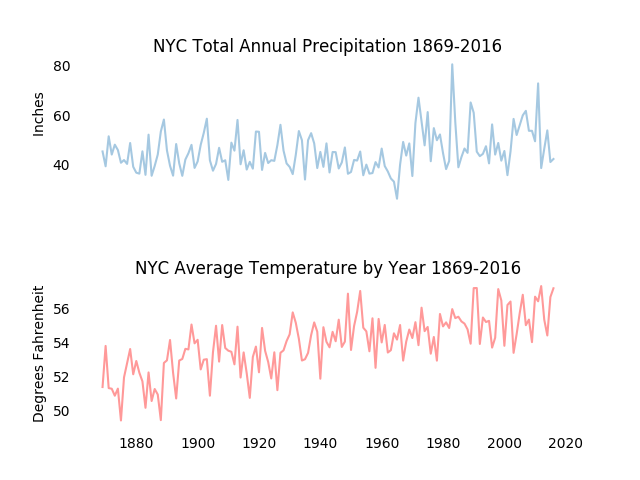

In [38]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
plt.subplots_adjust(hspace=0.5)
ax1.plot(nycprecip_total.loc[1869:2016], alpha=.4) #to make the date range the same on both
ax1.set_title('NYC Total Annual Precipitation 1869-2016')
ax1.set_ylabel('        Inches')
clean_graph(ax1, left='on')
ax2.plot(nyctemps_yearavg.loc[1869:2016], color='red', alpha=.4)
ax2.set_title('NYC Average Temperature by Year 1869-2016')
ax2.set_ylabel('Degrees Fahrenheit')
clean_graph(ax2, left='on')

#f.savefig('1896-2016 Comparison of Temperature and Precipitation in NYC.png')

# 5. Justification of Visualization

The original question was: How have temperature and precipitation patterns in NYC changed over time? Initially, I was expecting to find some correlation between the two measures of weather, but that was not the case. Because of this, the separate plots are much more informative than an overlapping graph would be. The other issue with overlapping the graphs is that both have values which vary significantly from year to year, and are therefore complex even before overlapping.

While precipitation and temperature do not seem to have any overall value correlation, both illustrate a fairly recent change in the historical pattern. While the average temperature seems to begin increasing before 1900, the variation after 1990 seems to be much more pronounced, with every other year or so spiking/dipping. Similarly, the precipitation chart shows much more erratic behavior after 1970 than it did before. 
